In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [2]:
data=pd.read_csv("AAPL.csv")
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100178,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094952,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087983,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090160,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092774,73449600
...,...,...,...,...,...,...,...
10463,2022-06-13,132.869995,135.199997,131.440002,131.880005,131.880005,122207100
10464,2022-06-14,133.130005,133.889999,131.479996,132.759995,132.759995,84784300
10465,2022-06-15,134.289993,137.339996,132.160004,135.429993,135.429993,91533000
10466,2022-06-16,132.080002,132.389999,129.039993,130.059998,130.059998,108123900


In [3]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100178,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094952,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087983,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090160,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092774,73449600


In [4]:
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [5]:
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

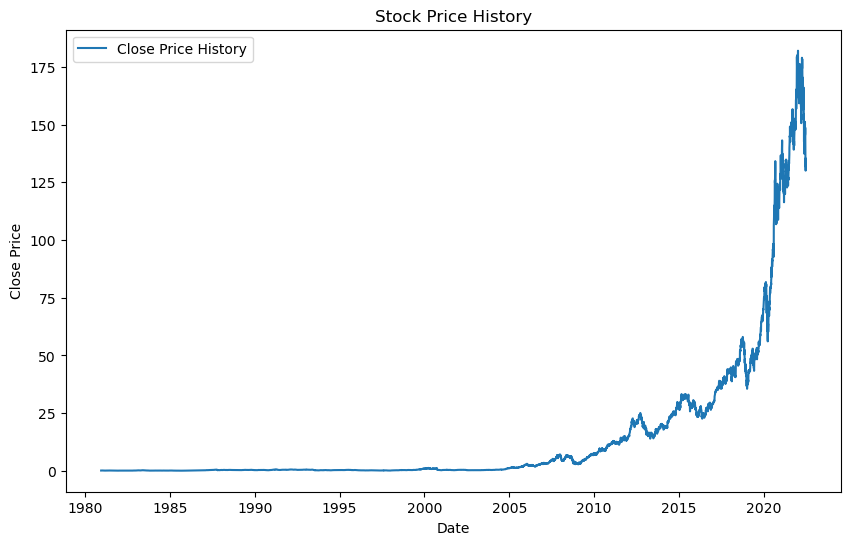

In [6]:
plt.figure(figsize=(10,6))
plt.plot(data['Close'], label='Close Price History')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Stock Price History')
plt.legend()
plt.show()

In [7]:
data_close = data['Close'].values.reshape(-1, 1)

In [8]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data_close)

In [9]:
training_size = int(len(scaled_data) * 0.8)
train_data, test_data = scaled_data[0:training_size], scaled_data[training_size:]

In [10]:
def create_dataset(dataset, time_step=1):
    X, Y = [], []
    for i in range(len(dataset) - time_step):
        X.append(dataset[i:(i + time_step), 0])
        Y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(Y)

In [11]:
time_step = 5
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [12]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [13]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=False, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [14]:
model.fit(X_train, y_train, epochs=50, batch_size=1, verbose=1)

Epoch 1/50

8369/8369 [==============================] - 25s 3ms/step - loss: 9.6709e-06
Epoch 2/50
8369/8369 [==============================] - 23s 3ms/step - loss: 3.2030e-06
Epoch 3/50
8369/8369 [==============================] - 23s 3ms/step - loss: 2.3050e-06
Epoch 4/50
8369/8369 [==============================] - 26s 3ms/step - loss: 1.8238e-06
Epoch 5/50
8369/8369 [==============================] - 27s 3ms/step - loss: 1.6776e-06
Epoch 6/50
8369/8369 [==============================] - 24s 3ms/step - loss: 1.4825e-06
Epoch 7/50
8369/8369 [==============================] - 30s 4ms/step - loss: 1.3132e-06
Epoch 8/50
8369/8369 [==============================] - 24s 3ms/step - loss: 1.3867e-06
Epoch 9/50
8369/8369 [==============================] - 24s 3ms/step - loss: 1.2741e-06
Epoch 10/50
8369/8369 [==============================] - 34s 4ms/step - loss: 1.2731e-06
Epoch 11/50
8369/8369 [==============================] - 27s 3ms/step - loss: 1.1627e-06
Epoch 12/50
8369/8369 [======

In [15]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

66/66 [==============================] - 0s 3ms/step


In [16]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
y_train = scaler.inverse_transform([y_train])
y_test = scaler.inverse_transform([y_test])

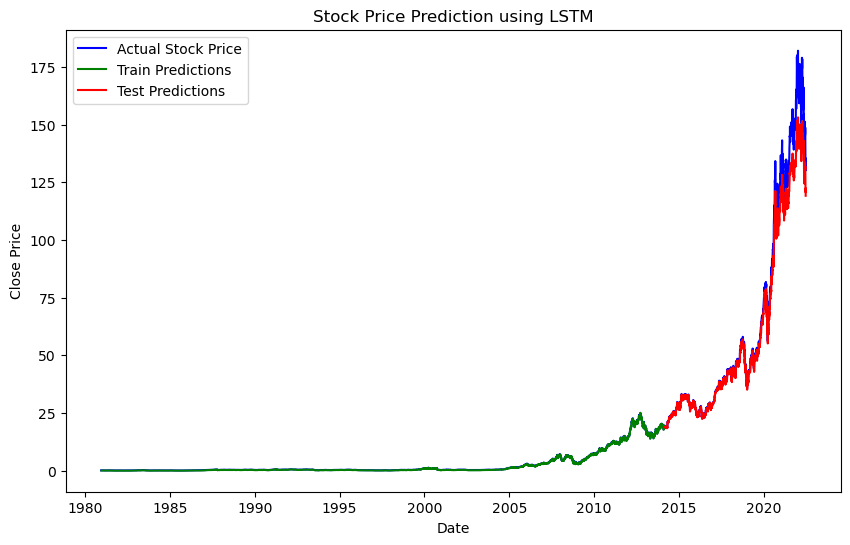

In [17]:
train_len = len(train_predict)
plt.figure(figsize=(10,6))
plt.plot(data['Close'], label='Actual Stock Price', color='blue')
plt.plot(data.index[time_step:train_len+time_step], train_predict, label='Train Predictions', color='green')
plt.plot(data.index[train_len+(time_step*2):len(data)], test_predict, label='Test Predictions', color='red')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Stock Price Prediction using LSTM')
plt.legend()
plt.show()

In [18]:
test_rmse = np.sqrt(mean_squared_error(y_test[0], test_predict))
print(f'Test RMSE: {test_rmse}')

Test RMSE: 7.741283206078079
